In [2]:
%matplotlib ipympl
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [3]:
df['Company Name'].nunique()

439

In [14]:
sum(df[df['Borough']=='Queens']['Job created'].dropna())

102.0

In [15]:
df['company email'].nunique()

420

In [44]:
nta_df = df.groupby(by='NTA').agg({'Company Name':'count','Total Savings':np.mean,'Job created':sum})
nta_df

,Company Name,Total Savings,Job created
NTA,,,
Astoria,3,11409.986667,0.0
Baisley Park,1,21522.740000,0.0
Battery Park City-Lower Manhattan,9,469890.796667,0.0
Bedford,3,62113.343333,0.0
Bensonhurst West,1,-379.470000,0.0
...,...,...,...
Whitestone,3,62038.306667,10.0
Williamsburg,1,23570.080000,0.0
Windsor Terrace,1,78573.320000,0.0


In [48]:
nta_df[nta_df['Company Name']>5].to_csv('nta_groupby.csv')

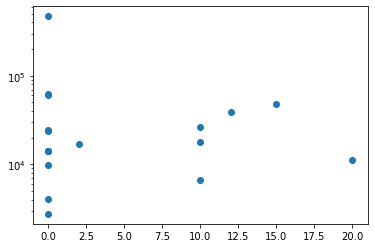

In [54]:
newdf = pd.read_csv('nta_groupby.csv')
plt.scatter(newdf['Job created'],newdf['Total Savings'])
plt.yscale('log')

(array([4., 6., 3., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([  1000.,  10980.,  20960.,  30940.,  40920.,  50900.,  60880.,
         70860.,  80840.,  90820., 100800., 110780., 120760., 130740.,
        140720., 150700., 160680., 170660., 180640., 190620., 200600.,
        210580., 220560., 230540., 240520., 250500., 260480., 270460.,
        280440., 290420., 300400., 310380., 320360., 330340., 340320.,
        350300., 360280., 370260., 380240., 390220., 400200., 410180.,
        420160., 430140., 440120., 450100., 460080., 470060., 480040.,
        490020., 500000.]),
 <a list of 50 Patch objects>)

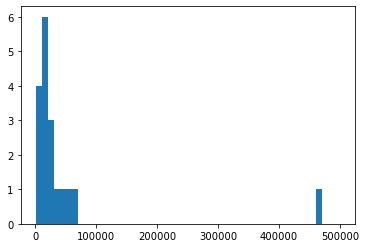

In [58]:
bins = np.linspace(1000,500000,51)
plt.hist(newdf['Total Savings'],bins=bins)

In [5]:
df['Month']=pd.to_datetime(df['Effective Date']).dt.to_period('M')
# df['Year']=pd.to_datetime(df['Effective Date']).dt.year
df

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Month
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood,2005-03
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy,2008-04
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan,2015-01
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West,2020-02
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan,2017-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South,2008-12
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South,2017-12
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...,2018-08
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North,2016-01


In [6]:
gdf = df.groupby(by='Month').sum('Total Savings')
gdf

,Postcode,Current fulltime,Job created,Job retain,Total Savings,Savings from beginning receiving benefits,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
Month,,,,,,,,,,,,,
1993-02,11208,130.0,15.0,260.0,10646.47,1242068.09,40.660676,-73.874955,305.0,42.0,1078.0,0.0,0.000000e+00
2004-03,11356,41.0,10.0,82.0,4026.73,34483.56,40.786469,-73.834527,407.0,19.0,945.0,4445908.0,4.040120e+09
2005-02,10474,30.0,12.0,30.0,181579.24,1132936.57,40.810305,-73.873691,202.0,17.0,117.0,2127434.0,2.027700e+09
2005-03,11230,0.0,0.0,0.0,0.00,349.78,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09
2005-06,11368,58.0,0.0,23.0,40896.53,684838.68,40.742133,-73.865661,404.0,21.0,411.0,4440227.0,4.018800e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03,22464,30.0,0.0,0.0,2478.24,7259.51,81.311751,-148.015566,614.0,76.0,4.0,6735593.0,6.013900e+09
2020-04,31261,101.0,0.0,0.0,7122.62,22603.90,122.158974,-221.937858,813.0,67.0,157.0,8356182.0,8.018340e+09
2020-05,22437,38.0,0.0,0.0,3018.59,10339.30,81.354081,-147.982320,609.0,71.0,545.0,6733816.0,6.027180e+09


/opt/miniconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/miniconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/miniconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


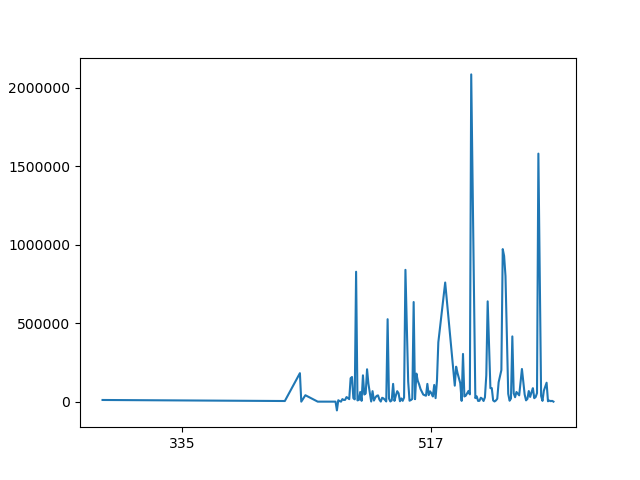

In [7]:
import matplotlib.dates as mdates
plt.plot(gdf.index,gdf['Total Savings'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(6, 12)))


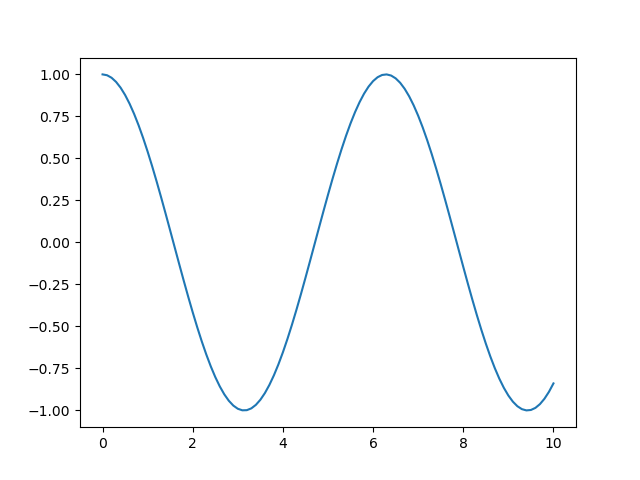

In [3]:
x = np.linspace(0,10,101)
y = np.cos(x)
plt.plot(x,y)